In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
%matplotlib inline
from IPython.display import Image
from collections import Counter

### checar parser, regular expressions

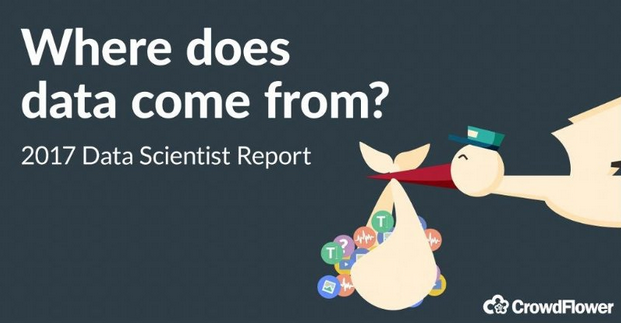

In [389]:
Image("data.png")

### HTML Looks like this

<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html>


### several tags

In [5]:
https://developer.mozilla.org/en-US/docs/Web/HTML/Element

SyntaxError: invalid syntax (<ipython-input-5-af6288d5d537>, line 1)

## we ask permision to the website

In [2]:
website = 'http://www.fis.cinvestav.mx/es/content/view/10/18/'

import requests

page = requests.get(website)
page

/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


<Response [200]>

# La pag de Fisica esta muy mal escrita

## to get all the content

In [3]:
page.content

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<link href="https://framework-gb.cdn.gob.mx/assets/styles/main.css" rel="stylesheet">\n\n<!-- <link href="https://framework-gb.cdn.gob.mx/assets/styles/main.css" rel="stylesheet"> -->\n\n<title>Departamento de Fisica - Investigadores</title>\n<meta name="description" content="Departamento de Fisica" />\n<meta name="keywords" content="Fisica" />\n<meta name="Generator" content="Joomla! - Copyright (C) 2005 - 2007 Open Source Matters. All rights reserved." />\n<meta name="robots" content="index, follow" />\n<base href="https://www.fis.cinvestav.mx/es/" />\r\n\t<link rel="shortcut icon" href="https://www.fis.cinvestav.mx/es/images/favicon.ico" />\n\t\r\n\r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\r\n<link href="https://www.fis.cinvestav.mx/es/templates/rt_sporticus_v2/cs

## Parsing a page

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [11]:
#soup

## In HTML format

In [5]:
#print(soup.prettify())

In [6]:
anchor = soup.find_all("a")
anchor[:10]

[<a class="nounder" href="https://www.fis.cinvestav.mx/es"><img alt="" border="0" id="logo" src="https://www.fis.cinvestav.mx/es/images/blank.png"/></a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/39/">\n\t\t\tCursos optativos</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/38/79/">\n\t\t\tOptativas</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/37/75/">\n\t\t\tCursos optativos</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/36/74/">\n\t\t\tIn Memoriam</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/34/68/">\n\t\t\tEl Departamento en la Prensa</a>,
 <a href="https://www.fis.cinvestav.mx/es/component/option,com_frontpage/Itemid,1/">Principal</a>,
 <a class="topdaddy" href="https://www.fis.cinvestav.mx/es/content/view/1/9/">Admisi\xf3n</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/33/66/">Examenes de Nivel</a>,
 <a class

In [17]:
anchor[1].get_text()

u'\n\t\t\tCursos optativos'

## same with links

In [18]:
links = soup.find_all("li")
#links

In [19]:
names = [a for a in soup.find_all('a') if a.get('href')]
names[:30]

[<a class="nounder" href="https://www.fis.cinvestav.mx/es"><img alt="" border="0" id="logo" src="https://www.fis.cinvestav.mx/es/images/blank.png"/></a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/39/">\n\t\t\tCursos optativos</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/38/79/">\n\t\t\tOptativas</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/37/75/">\n\t\t\tCursos optativos</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/36/74/">\n\t\t\tIn Memoriam</a>,
 <a class="latestnews" href="https://www.fis.cinvestav.mx/es/content/view/34/68/">\n\t\t\tEl Departamento en la Prensa</a>,
 <a href="https://www.fis.cinvestav.mx/es/component/option,com_frontpage/Itemid,1/">Principal</a>,
 <a class="topdaddy" href="https://www.fis.cinvestav.mx/es/content/view/1/9/">Admisi\xf3n</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/33/66/">Examenes de Nivel</a>,
 <a class

## but only those with no class

In [20]:
names = [a for a in soup.find_all('a') if a.get('href') and not a.get('class')]

In [21]:
names

[<a href="https://www.fis.cinvestav.mx/es/component/option,com_frontpage/Itemid,1/">Principal</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/33/66/">Examenes de Nivel</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/8/3/">Cursos Proped\xe9uticos</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/3/4/">Maestr\xed\xada</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/2/5/">Doctorado</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/4/6/">Doctorado Directo</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/6/7/">Prog Cursos Proped</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/7/8/">Cont. Prog. de M y DD</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/32/64/">Reglamentos Acad.</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/38/79/">Optativas</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/36/74/">In Memoriam</a>,
 <a href="https://www.fis.cinvestav.mx/es/content/view/9/16/">Dire

In [16]:
soup.find_all('a', {'href':'http://www.fis.cinvestav.mx/~stomas'})

[]

## PAgina web, no muy bien escrita!!

In [22]:
table = soup.find_all('table', {'class':"contentpaneopen"})

In [23]:
len(table[1].find_all('a'))

54

In [24]:
for i in table[1].find_all('a'):
    print i.contents[0]

 Ayón Beato, Eloy
 Baquero Parra, Rafael
 Bermúdez Rosales, David
 Bretón Báez, Nora Eva
 Capovilla, Riccardo
 Carbajal Tinoco, Mauricio Demetrio
 Castilla Valdez, Heriberto
 Castro Hernández, Jorge Javier
 Cobos Martínez, J. Javier
 Conde Gallardo, Agustín
 Contreras Astorga, Alonso
 Cruz Orea, Alfredo
 De La Cruz Burelo, Eduard
 De Santiago Sanabria, Josue
 Falcony Guajardo, Ciro
 Fernández Cabrera, David José
 García Díaz, Alberto Alejandro
 García Compeán, Héctor Hugo
 García Rocha, Miguel
 Gallardo Hernández, Salvador
 González de la Cruz, Gerardo
 González Mozuelos, Pedro
 Gurevich Genrihovich, Yuri
 Heredia de la Cruz, Iván
 Hernández Calderón, Isaac
 Hernández Contreras, Martín
 Herrera Corral, Gerardo
 Kielanowski Chomicz, Piotr
 López Castro, Gabriel
 López Fernández, Ricardo
 López López, Máximo
 Manko Semionovich, Vladimir
 Matos Chassin, Tonatiuh
 Meléndez Lira, Miguel Ãngel
 Méndez Alcaraz, José Miguel
 Mendoza Alvarez, Julio G.
 Mielnik Manwelow, Bogdan
 Miranda Romagnol

## Ni modo, ahora a mano

In [25]:
table[1]
#print(table[1].text)

<table class="contentpaneopen">\n<tr>\n<td colspan="2" valign="top">\n<a href="https://www.fis.cinvestav.mx/~ayon-beato"> Ay\xf3n Beato, Eloy</a><br/>\r\nDr., Cinvestav (2000). Gravitaci\xf3n y Geometr\xeda (T): f\xedsica de agujeros negros, gravedad en diversas dimensiones.<br/>\r\nayon-beato at fis.cinvestav.mx<br/>\r\nExt. 6162<br/><br/>\n<a href="https://www.fis.cinvestav.mx/~rbaquero"> Baquero Parra, Rafael</a><br/>\r\nDr., Cinvestav (1976). Materia condensada (T): superconductividad, f\xedsica de superficies.<br/>\r\nrbaquero at fis.cinvestav.mx<br/>\r\nExt. 6179<br/><br/>\n<a href="https://www.fis.cinvestav.mx/~dbermudez"> Berm\xfadez Rosales, David</a><br/>\r\nDr. Cinvestav (2013). Fisicamatem\xe1tica (T): Din\xe1mica de pulsos ultra cortos, an\xe1logos de la radiaci\xf3n de Hawking con \xf3ptica cu\xe1ntica, mec\xe1nica cu\xe1ntica supersim\xe9trica y soluciones anal\xedticas de las ecuaciones de Painlev\xe9.  <br/>\r\ndbermudez at fis.cinvestav.mx<br/>\r\nExt. 6142<br/><br/>\

In [26]:
persons = table[1].text.split('Ext')

In [27]:
for person in persons[:5]:
    print person




 Ayón Beato, Eloy
Dr., Cinvestav (2000). Gravitación y Geometría (T): física de agujeros negros, gravedad en diversas dimensiones.
ayon-beato at fis.cinvestav.mx

. 6162
 Baquero Parra, Rafael
Dr., Cinvestav (1976). Materia condensada (T): superconductividad, física de superficies.
rbaquero at fis.cinvestav.mx

. 6179
 Bermúdez Rosales, David
Dr. Cinvestav (2013). Fisicamatemática (T): Dinámica de pulsos ultra cortos, análogos de la radiación de Hawking con óptica cuántica, mecánica cuántica supersimétrica y soluciones analíticas de las ecuaciones de Painlevé.  
dbermudez at fis.cinvestav.mx

. 6142
 Bretón Báez, Nora Eva
Dra., Cinvestav (1986). Relatividad y gravitación (T): soluciones exactas de las ecuaciones de Einstein.
nora at fis.cinvestav.mx

. 6133
 Capovilla, Riccardo
Dr., Univ. de Maryland, EUA (1991). Relatividad y gravitación (T): teorías de campos, objetos extendidos, defectos topológicos y membranas.
capo at fis.cinvestav.mx



In [28]:
def all_data(person):
    person_data = person.strip('\t\r\n').split('\n')
    _, full_name, info, correo = person_data
    surname, name           = full_name.split(',')
    lugar, tema             = info.split(':')
    otro, campo             = lugar[:-3].split(')')
    campo                   = campo.replace(".", " ")
    tmp                     = otro.split()
    anio                    =  tmp.pop(-1).replace("(", " ")
    tmp.pop(0)
    lugar_dr                = ' '.join(tmp) 
    #campo, tema             = area.split(':')
    return [name, surname, lugar_dr, anio, campo, tema, correo]

In [29]:
# for zero, doesn't work
a = all_data(persons[4])
a

[u' Riccardo\r',
 u' Capovilla',
 u'Univ. de Maryland, EUA',
 u' 1991',
 u'  Relatividad y gravitaci\xf3n ',
 u' teor\xedas de campos, objetos extendidos, defectos topol\xf3gicos y membranas.\r',
 u'capo at fis.cinvestav.mx']

In [30]:
#Careful with commas and stops
i=0
df_persons = []
for person in persons[1:]:
    i+=1
    try:
        df_persons.append(all_data(person))
    except:
        continue
    #print(i)


In [31]:
info_fisica= pd.DataFrame(df_persons, columns=['name', 'surname', 'lugar_dr', 'anio', 'campo', 'tema', 'correo'])
info_fisica

,name,surname,lugar_dr,anio,campo,tema,correo
0,Rafael\r,Baquero Parra,Cinvestav,1976,Materia condensada,"superconductividad, física de superficies.\r",rbaquero at fis.cinvestav.mx
1,David\r,Bermúdez Rosales,Cinvestav,2013,Fisicamatemática,"Dinámica de pulsos ultra cortos, análogos de ...",dbermudez at fis.cinvestav.mx
2,Nora Eva\r,Bretón Báez,Cinvestav,1986,Relatividad y gravitación,soluciones exactas de las ecuaciones de Einst...,nora at fis.cinvestav.mx
3,Riccardo\r,Capovilla,"Univ. de Maryland, EUA",1991,Relatividad y gravitación,"teorías de campos, objetos extendidos, defect...",capo at fis.cinvestav.mx
4,Mauricio Demetrio\r,Carbajal Tinoco,UASLP,1997,Física estadística(T,fluidos complejos.\r,mdct at fis.cinvestav.mx
5,Heriberto\r,Castilla Valdez,Cinvestav,1991,Partículas y campos,colisiones protón-protón a 2 TeV con el detec...,castilla at fis.cinvestav.mx
6,Jorge Javier\r,Castro Hernández,"Univ. de Oxford, Inglaterra",1972,Materia condensada,superconductividad de alta TC. Teoría de much...,jjcastro at fis.cinvestav.mx
7,Agustín\r,Conde Gallardo,Cinvestav,1995,Materia condensada,superconductores del alta TC y fotoluminiscen...,aconde at fis.cinvestav.mx
8,Alfredo\r,Cruz Orea,"Univ. Estatal de Campinas, Brasil",1994,Materia condensada,técnicas fototérmicas aplicadas a semiconduct...,orea at fis.cinvestav.mx.
9,Eduard\r,De La Cruz Burelo,Cinvestav,2005,partículas y campos,"Física de hadrones B en D0 (Fermilab), y prot...",eduard at fis.cinvestav.mx


In [32]:
#Pero en total son 50, faltan 5!
#Look at Compean, Ricardo Lopez !!
len(info_fisica)

47

# Por lugares

In [33]:
locales =info_fisica[info_fisica['lugar_dr']=='Cinvestav']
locales

,name,surname,lugar_dr,anio,campo,tema,correo
0,Rafael\r,Baquero Parra,Cinvestav,1976,Materia condensada,"superconductividad, física de superficies.\r",rbaquero at fis.cinvestav.mx
1,David\r,Bermúdez Rosales,Cinvestav,2013,Fisicamatemática,"Dinámica de pulsos ultra cortos, análogos de ...",dbermudez at fis.cinvestav.mx
2,Nora Eva\r,Bretón Báez,Cinvestav,1986,Relatividad y gravitación,soluciones exactas de las ecuaciones de Einst...,nora at fis.cinvestav.mx
5,Heriberto\r,Castilla Valdez,Cinvestav,1991,Partículas y campos,colisiones protón-protón a 2 TeV con el detec...,castilla at fis.cinvestav.mx
7,Agustín\r,Conde Gallardo,Cinvestav,1995,Materia condensada,superconductores del alta TC y fotoluminiscen...,aconde at fis.cinvestav.mx
9,Eduard\r,De La Cruz Burelo,Cinvestav,2005,partículas y campos,"Física de hadrones B en D0 (Fermilab), y prot...",eduard at fis.cinvestav.mx
12,David José\r,Fernández Cabrera,Cinvestav,1988,Fisicamatemática,dinámica de Schrödinger.\r,david at fis.cinvestav.mx
14,Miguel\r,García Rocha,Cinvestav,1995,Materia condensada,propiedades ópticas de semiconductores. Físic...,mrocha at fis.cinvestav.mx
16,Pedro\r,González Mozuelos,Cinvestav,1992,Física estadística,propiedades estructurales de suspensiones col...,pedro at fis.cinvestav.mx
18,Iván\r,Heredia de la Cruz,Cinvestav,2012,Partículas y campos,Física de hadrones con sabor pesado en CMS (C...,iheredia at fis.cinvestav.mx


In [35]:
len(locales)

25

In [36]:
float(len(locales))/len(info_fisica)*100

53.191489361702125

In [37]:
foraneos =info_fisica[info_fisica['lugar_dr']!='Cinvestav']
foraneos

,name,surname,lugar_dr,anio,campo,tema,correo
3,Riccardo\r,Capovilla,"Univ. de Maryland, EUA",1991,Relatividad y gravitación,"teorías de campos, objetos extendidos, defect...",capo at fis.cinvestav.mx
4,Mauricio Demetrio\r,Carbajal Tinoco,UASLP,1997,Física estadística(T,fluidos complejos.\r,mdct at fis.cinvestav.mx
6,Jorge Javier\r,Castro Hernández,"Univ. de Oxford, Inglaterra",1972,Materia condensada,superconductividad de alta TC. Teoría de much...,jjcastro at fis.cinvestav.mx
8,Alfredo\r,Cruz Orea,"Univ. Estatal de Campinas, Brasil",1994,Materia condensada,técnicas fototérmicas aplicadas a semiconduct...,orea at fis.cinvestav.mx.
10,Josue\r,De Santiago Sanabria,UNAM,2014,Cosmología y gravitación,"modelos de materia oscura, energía oscura e ...",jsantiago at fis.cinvestav.mx
11,Ciro\r,Falcony Guajardo,"Univ. de Lehigh, EUA",1980,Materia condensada,dispositivos tipo MOS. Películas delgadas sem...,cfalcony at fis.cinvestav.mx
13,Alberto Alejandro\r,García Díaz,"Universidad Lomonosov, Rusia",1990,Relatividad y Gravitación,Soluciones exactas en Relatividad General.\r,aagarcia at fis.cinvestav.mx
15,Gerardo\r,González de la Cruz,"Univ. Estatal de Campinas, Brasil",1980,Materia condensada,propiedades electrónicas en sistemas de dos d...,bato at fis.cinvestav.mx
17,Yuri\r,Gurevich Genrihovich,"Academia de Ciencias-Leningrado, Rusia",1968,Materia condensada,"películas delgadas semiconductoras, propiedad...",gurevich at fis.cinvestav.mx
19,Isaac\r,Hernández Calderón,"Univ. Estatal de Campinas, Brasil",1981,Materia condensada,"propiedades ópticas, eléctricas y estructural...",ihernand at fis.cinvestav.mx


In [38]:
lforaneos = foraneos.lugar_dr.values.tolist()
lforaneos

[u'Univ. de Maryland, EUA',
 u'UASLP',
 u'Univ. de Oxford, Inglaterra',
 u'Univ. Estatal de Campinas, Brasil',
 u'UNAM',
 u'Univ. de Lehigh, EUA',
 u'Universidad Lomonosov, Rusia',
 u'Univ. Estatal de Campinas, Brasil',
 u'Academia de Ciencias-Leningrado, Rusia',
 u'Univ. Estatal de Campinas, Brasil',
 u'Univ. de Dortmund, Alemania',
 u'Univ. de Varsovia, Polonia',
 u'Univ. de Lovaina, B\xe9lgica',
 u'Univ. Toyohashi, Jap\xf3n',
 u'Univ. de la Amistad de los Pueblos, Rusia',
 u'Univ. F. Schiller-Jena, Alemania',
 u'Univ. de Constanza, Alemania',
 u'Univ. Estatal de Campinas, Brasil',
 u'Univ. de Valencia, Espa\xf1a',
 u'University of Fribourg, Switzerland',
 u'Univ. de Sao Paulo, Brasil',
 u'IIM-UNAM']

In [39]:
uni = []
place=[]
for f in lforaneos:
    if ',' in f:
        a, b = f.split(',')
    else:
        a, b = f, 'MXN'
    uni.append(a) 
    place.append(b)


In [40]:
Counter(place)

Counter({u' Alemania': 3,
         u' Brasil': 5,
         u' B\xe9lgica': 1,
         u' EUA': 2,
         u' Espa\xf1a': 1,
         u' Inglaterra': 1,
         u' Jap\xf3n': 1,
         u' Polonia': 1,
         u' Rusia': 3,
         u' Switzerland': 1,
         'MXN': 3})

In [41]:
Counter(uni)

Counter({u'Academia de Ciencias-Leningrado': 1,
         u'IIM-UNAM': 1,
         u'UASLP': 1,
         u'UNAM': 1,
         u'Univ. Estatal de Campinas': 4,
         u'Univ. F. Schiller-Jena': 1,
         u'Univ. Toyohashi': 1,
         u'Univ. de Constanza': 1,
         u'Univ. de Dortmund': 1,
         u'Univ. de Lehigh': 1,
         u'Univ. de Lovaina': 1,
         u'Univ. de Maryland': 1,
         u'Univ. de Oxford': 1,
         u'Univ. de Sao Paulo': 1,
         u'Univ. de Valencia': 1,
         u'Univ. de Varsovia': 1,
         u'Univ. de la Amistad de los Pueblos': 1,
         u'Universidad Lomonosov': 1,
         u'University of Fribourg': 1})

In [55]:
x =foraneos.assign(pais= place)

In [57]:
x['pais'] #[foraneos ['pais']] #.str.contains("Brasil")]  

3              EUA
4              MXN
6       Inglaterra
8           Brasil
10             MXN
11             EUA
13           Rusia
15          Brasil
17           Rusia
19          Brasil
20        Alemania
21         Polonia
22         Bélgica
23           Japón
24           Rusia
25        Alemania
27        Alemania
28          Brasil
36          España
37     Switzerland
40          Brasil
41             MXN
Name: pais, dtype: object

# Por anio de Doctorado

In [59]:
info_fisica.loc[info_fisica['anio'] == info_fisica['anio'].max()]

,name,surname,lugar_dr,anio,campo,tema,correo
10,Josue\r,De Santiago Sanabria,UNAM,2014,Cosmología y gravitación,"modelos de materia oscura, energía oscura e ...",jsantiago at fis.cinvestav.mx


In [62]:
info_fisica.loc[info_fisica['anio'] == info_fisica['anio'].min()]

,name,surname,lugar_dr,anio,campo,tema,correo
29,Bogdan\r,Mielnik Manwelow,Cinvestav,1964,Fisicamatemática,"movilidad de sistemas dinámicos no lineales, ...",bogdan at fis.cinvestav.mx


In [63]:
2017 - 1964

53

In [66]:
info_fisica.sort_values('anio')

,name,surname,lugar_dr,anio,campo,tema,correo
29,Bogdan\r,Mielnik Manwelow,Cinvestav,1964,Fisicamatemática,"movilidad de sistemas dinámicos no lineales, ...",bogdan at fis.cinvestav.mx
17,Yuri\r,Gurevich Genrihovich,"Academia de Ciencias-Leningrado, Rusia",1968,Materia condensada,"películas delgadas semiconductoras, propiedad...",gurevich at fis.cinvestav.mx
46,Arnulfo\r,Zepeda Domínguez,Cinvestav,1970,Partículas y campos (T,"fenomenología de teorías de gran unificación,...",zepeda at fis.cinvestav.mx
40,Feliciano\r,Sánchez Sinencio,"Univ. de Sao Paulo, Brasil",1970,Materia condensada,"propiedades fotoelectrónicas de materiales, b...",fsanchez at fis.cinvestav.mx
21,Piotr\r,Kielanowski Chomicz,"Univ. de Varsovia, Polonia",1971,Partículas y campos,interacciones débiles. Modelo de quarks. Fenó...,kiel at fis.cinvestav.mx
34,Miguel Ángel\r,Pérez Angón,Cinvestav,1972,Partículas y campos,"fenomenología de modelos de norma, teorías ef...",mperez at fis.cinvestav.mx
6,Jorge Javier\r,Castro Hernández,"Univ. de Oxford, Inglaterra",1972,Materia condensada,superconductividad de alta TC. Teoría de much...,jjcastro at fis.cinvestav.mx
0,Rafael\r,Baquero Parra,Cinvestav,1976,Materia condensada,"superconductividad, física de superficies.\r",rbaquero at fis.cinvestav.mx
44,Carlos\r,Vázquez López,Cinvestav,1979,Materia condensada,microscopía de tunelamiento y de fuerza atómi...,cvlopez at fis.cinvestav.mx
28,Julio G.\r,Mendoza Alvarez,"Univ. Estatal de Campinas, Brasil",1979,Materia condensada,propiedades ópticas de semiconductores. Dispo...,jmendoza at fis.cinvestav.mx


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d49ddd0>]],
      dtype=object)

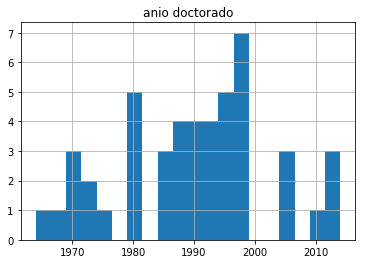

In [72]:
import numpy as np
df =pd.DataFrame({'anio doctorado':np.array(info_fisica['anio'].values.astype(float))})
df.hist(bins=20)   

In [73]:
df.describe()

,anio doctorado
count,47.000000
mean,1989.851064
std,12.314676
min,1964.000000
25%,1980.500000
50%,1991.000000
75%,1997.000000
max,2014.000000


In [74]:
df.mode()

,anio doctorado
0,1997.0


In [76]:
Counter(info_fisica['campo'])

Counter({u'  Cosmolog\xeda y gravitaci\xf3n ': 1,
         u'  Fisicamatem\xe1tica ': 5,
         u'  Fisicamatem\xe1tica y gravitaci\xf3n ': 1,
         u'  Fisicamatem\xe1tica y relatividad ': 1,
         u'  F\xedsica Estad\xedstica ': 1,
         u'  F\xedsica estad\xedstica ': 2,
         u'  F\xedsica estad\xedstica(T': 1,
         u'  F\xedsica m\xe9dica y f\xedsica de altas energ\xedas ': 1,
         u'  Geometr\xeda y Gravitaci\xf3n ': 1,
         u'  Materia condensada ': 17,
         u'  Materia condensada y estado s\xf3lido ': 1,
         u'  Part\xedculas y campos ': 10,
         u'  Part\xedculas y campos (T': 1,
         u'  Relatividad y Gravitaci\xf3n ': 1,
         u'  Relatividad y gravitaci\xf3n ': 2,
         u'  part\xedculas y campos ': 1})

# Arts

In [77]:
info_fisica['name'].head()

0                Rafael\r
1                 David\r
2              Nora Eva\r
3              Riccardo\r
4     Mauricio Demetrio\r
Name: name, dtype: object

In [78]:
info_fisica[info_fisica['name'].str.contains('Oscar')]

,name,surname,lugar_dr,anio,campo,tema,correo
38,José Oscar\r,Rosas Ortiz,Cinvestav,1997,Fisicamatemática,"formalismo de la mecánica cuántica,estados co...",orosas at fis.cinvestav.mx


In [92]:
website = 'http://www.webometrics.info/en/node/63'

import requests

page  = requests.get(website)
soupa = BeautifulSoup(page.content, 'html.parser')

In [93]:
#soupa.prettify()

In [94]:
for i in soupa.findAll('a', href=True): #'Oscar Rosas'
    if 'Merced Montesinos' in i.text:
        link_mer = i['href']

In [95]:
#soupa.findAll('a', href=True)

In [96]:
link_mer

u'https://scholar.google.com/citations?user=dobwpMYAAAAJ'

# Solo Merced

In [97]:
website = link_mer

import requests

page  = requests.get(website)
soupm = BeautifulSoup(page.content, 'html.parser')

/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


SSLError: hostname 'scholar.google.com' doesn't match 'www.google.com'

In [509]:
#BF gravity and
#soupm.prettify()

In [510]:
all_merced = soupm.findAll('a', {'class':"gsc_a_at"})

In [511]:
len(arts_merced)

20

In [512]:
arts_meche = [i.text for i in all_merced]
arts_meche, len(arts_meche)

([u'BF gravity and the Immirzi parameter',
  u'SL (2, R) model with two Hamiltonian constraints',
  u'Relational evolution of the degrees of freedom of generally covariant quantum theories',
  u'Covariant canonical formalism for four-dimensional BF theory',
  u'Statistical mechanics of generally covariant quantum theories: a Boltzmann-like approach',
  u'Self-dual gravity with topological terms',
  u'Symplectic quantization, inequivalent quantum theories, and Heisenberg\u2019s principle of uncertainty',
  u'Alternative symplectic structures for SO (3, 1) and SO (4) four-dimensional BF theories',
  u'Topological limit of gravity admitting an S U (2) connection formulation',
  u"Symmetric energy-momentum tensor in Maxwell, Yang-Mills, and Proca theories obtained using only Noether's theorem",
  u"Minimal coupling and Feynman's proof",
  u'Geometric thermodynamics: black holes and the meaning of the scalar curvature',
  u'Two-dimensional topological field theories coupled to four-dimensio

In [513]:
authors_merced = soupm.findAll('div', {'class':"gs_gray"})

In [514]:
authors_meche = [a.text for i, a in enumerate(authors_merced) if i%2==0]
authors_meche, len(authors_meche)

([u'R Capovilla, M Montesinos, VA Prieto, E Rojas',
  u'M Montesinos, C Rovelli, T Thiemann',
  u'M Montesinos',
  u'M Mondrag\xf3n, M Montesinos',
  u'M Montesinos, C Rovelli',
  u'M Montesinos',
  u'M Montesinos, GFT del Castillo',
  u'M Montesinos',
  u'L Liu, M Montesinos, A Perez',
  u'M Montesinos, E Flores',
  u'M Montesinos, A P\xe9rez-Lorenzana',
  u'M\xc1 Garc\xeda-Ariza, M Montesinos, GF Torres del Castillo',
  u'M Montesinos, A Perez',
  u'V Cuesta, M Montesinos',
  u'M Montesinos, JD Vergara',
  u'M Montesinos',
  u'AA Mart\xednez-Merino, M Montesinos',
  u'M Montesinos, M Vel\xe1zquez',
  u'A P\xe9rez-Lorenzana, M Montesinos, T Matos',
  u'V Cuesta, M Montesinos, JD Vergara'],
 20)

In [515]:
cites_merced = soupm.findAll('a', {'class':"gsc_a_ac gs_ibl"})


In [516]:
cites_meche = [int(c.text) for c in cites_merced]
cites_meche, len(cites_meche)

([72,
  62,
  36,
  34,
  26,
  24,
  22,
  20,
  17,
  17,
  17,
  14,
  14,
  14,
  14,
  13,
  11,
  10,
  10,
  10],
 20)

In [517]:
np.array(cites_meche).sum()

457

In [518]:
merced_info =pd.DataFrame({'paper':arts_meche, 'authors':authors_meche, 'cites':cites_meche})
merced_info.head()

,authors,cites,paper
0,"R Capovilla, M Montesinos, VA Prieto, E Rojas",72,BF gravity and the Immirzi parameter
1,"M Montesinos, C Rovelli, T Thiemann",62,"SL (2, R) model with two Hamiltonian constraints"
2,M Montesinos,36,Relational evolution of the degrees of freedom...
3,"M Mondragón, M Montesinos",34,Covariant canonical formalism for four-dimensi...
4,"M Montesinos, C Rovelli",26,Statistical mechanics of generally covariant q...


In [519]:
f = lambda i: len(i.split(','))
merced_info['#authors'] = merced_info['authors'].apply(f)

In [520]:
merced_info.head()

,authors,cites,paper,#authors
0,"R Capovilla, M Montesinos, VA Prieto, E Rojas",72,BF gravity and the Immirzi parameter,4
1,"M Montesinos, C Rovelli, T Thiemann",62,"SL (2, R) model with two Hamiltonian constraints",3
2,M Montesinos,36,Relational evolution of the degrees of freedom...,1
3,"M Mondragón, M Montesinos",34,Covariant canonical formalism for four-dimensi...,2
4,"M Montesinos, C Rovelli",26,Statistical mechanics of generally covariant q...,2


In [521]:
f = lambda i: int(i)
merced_info['cites'] = merced_info['cites'].apply(f)

In [522]:
merced_info['effec_cites'] = merced_info['cites']/merced_info['#authors']

In [523]:
merced_info

,authors,cites,paper,#authors,effec_cites
0,"R Capovilla, M Montesinos, VA Prieto, E Rojas",72,BF gravity and the Immirzi parameter,4,18.000000
1,"M Montesinos, C Rovelli, T Thiemann",62,"SL (2, R) model with two Hamiltonian constraints",3,20.666667
2,M Montesinos,36,Relational evolution of the degrees of freedom...,1,36.000000
3,"M Mondragón, M Montesinos",34,Covariant canonical formalism for four-dimensi...,2,17.000000
4,"M Montesinos, C Rovelli",26,Statistical mechanics of generally covariant q...,2,13.000000
5,M Montesinos,24,Self-dual gravity with topological terms,1,24.000000
6,"M Montesinos, GFT del Castillo",22,"Symplectic quantization, inequivalent quantum ...",2,11.000000
7,M Montesinos,20,"Alternative symplectic structures for SO (3, 1...",1,20.000000
8,"L Liu, M Montesinos, A Perez",17,Topological limit of gravity admitting an S U ...,3,5.666667
9,"M Montesinos, E Flores",17,"Symmetric energy-momentum tensor in Maxwell, Y...",2,8.500000


In [524]:
merced_info.effec_cites.sum()

238.16666666666669